In [62]:
import librosa 
import soundfile
import os,pickle,glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

# Feature Extraction to extact mfcc, chroma, mel features

In [63]:
# mfcc: Mel Frequency Cepstral Coefficient, represents the short-term power spectrum of a sound
# chroma: Pertains to the 12 different pitch classes
# mel: Mel Spectrogram Frequency

In [64]:
def exteact_feature(file_name,mfcc,chroma,mel):
    with soundfile.SoundFile(file_name) as sound_file: #opening sound file
        X=sound_file.read(dtype='float32')
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
            result=np.array([])
        if mfcc:
            mfcc=np.mean(librosa.feature.mfcc(y=X,sr=sample_rate,n_mfcc=40).T,axis=0)
            result=np.hstack((result,mfcc))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft,sr=sample_rate).T,axis=0)
            result=np.hstack((result,chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X,sr=sample_rate).T,axis=0)
            result=np.hstack((result,mel))
            
        return result    

In [65]:
emotions={ '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'}

observed_emotions=['calm','happy','fearful','disgust']

# Load the data and extract features fro each  sound file

In [66]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in glob.glob('D:\Downloads 2\speech-emotion-recognition-ravdess-data\\Actor_*\\*.wav'):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=exteact_feature(file,mfcc=True,chroma=True,mel=True)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x),y,test_size=test_size,random_state=9)

In [67]:

x_train,x_test,y_train,y_test=load_data(test_size=0.25)

In [68]:
print((x_train.shape[0], x_test.shape[0]))

(576, 192)


In [69]:
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


# MLP Classifier

In [70]:
model=MLPClassifier(alpha=0.01,batch_size=256,epsilon=1e-08, hidden_layer_sizes=(300,),learning_rate='adaptive',max_iter=500)

In [71]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [72]:
y_pred=model.predict(x_test)

In [73]:

accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 69.79%


In [74]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[50,  1,  3,  3],
       [ 6, 21,  9, 12],
       [ 1,  2, 30,  4],
       [ 4,  1, 12, 33]], dtype=int64)

<Axes: >

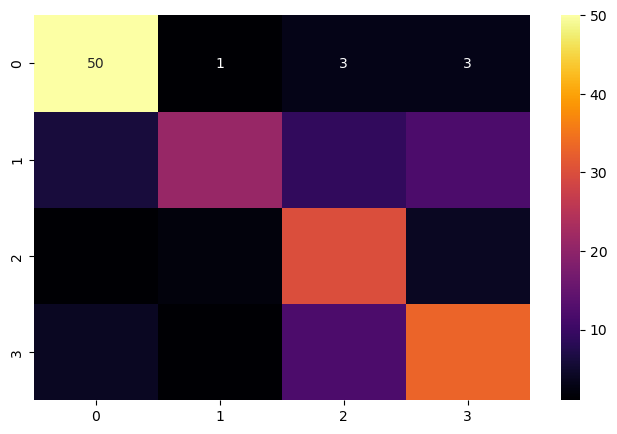

In [75]:
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cm,annot=True,cmap='inferno')